<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/hierarchy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns



In [ ]:
amazon = pd.read_csv('/content/Amazon Echo 2 Reviews.csv')

In [ ]:
amazon.isnull().sum()

,0
Pageurl,0
Title,0
Review Text,5
Review Color,0
User Verified,214
Review Date,0
Review Useful Count,6827
Configuration Text,0
Rating,0
Declaration Text,6849


In [ ]:
a = ['Review Text','User Verified','Declaration Text']

In [ ]:
for i in a:
  amazon[i] = amazon[i].fillna('unknown')

In [ ]:
amazon['Review Useful Count'] = amazon['Review Useful Count'].fillna(0)


In [ ]:
amazon.isnull().sum()

,0
Pageurl,0
Title,0
Review Text,0
Review Color,0
User Verified,0
Review Date,0
Review Useful Count,0
Configuration Text,0
Rating,0
Declaration Text,0


In [ ]:
amazon.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
for i in amazon.select_dtypes(include='object').columns:
  amazon[i] = le.fit_transform(amazon[i])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in amazon.columns:
  amazon[i] = sc.fit_transform(amazon[[i]])

In [ ]:
amazon

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,0.709048,1.476291,0.480230,-0.516815,-0.179511,-0.989388,-0.018276,-0.012079,-0.948560,0.027441
1,0.709048,-0.658967,-1.010531,1.934928,-0.179511,0.704922,-0.018276,-0.012079,-0.162679,0.027441
2,0.876118,-1.188574,-1.512419,1.934928,-0.179511,1.382646,-0.018276,-0.012079,0.623202,0.027441
3,0.876118,-0.670188,0.197099,-0.516815,-0.179511,-1.599339,-0.018276,-0.012079,0.623202,0.027441
4,0.876118,-0.670188,-1.060005,-0.516815,-0.179511,0.027198,-0.018276,-0.012079,0.623202,0.027441
...,...,...,...,...,...,...,...,...,...,...
6850,-0.548727,0.191546,1.018478,-0.516815,-0.179511,0.027198,-0.018276,-0.012079,0.623202,0.027441
6851,-0.548727,-0.670188,-0.297040,1.934928,-0.179511,-0.040574,-0.018276,-0.012079,0.623202,0.027441
6852,0.622665,1.652453,-0.799524,-0.516815,-0.179511,0.704922,-0.018276,-0.012079,-0.948560,0.027441
6853,0.319849,1.171094,-0.674946,-0.516815,-0.179511,0.772694,-0.018276,-0.012079,0.623202,0.027441


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(amazon)
x_pca

array([[-1.79556985, -0.6251872 ],
       [ 0.34602204,  1.17092797],
       [ 1.21145274,  1.7991584 ],
       ...,
       [-1.48545755, -0.01917713],
       [-0.18464372,  0.04500262],
       [-0.82605483, -0.2831714 ]])

In [ ]:
z = linkage(x_pca,method='ward')


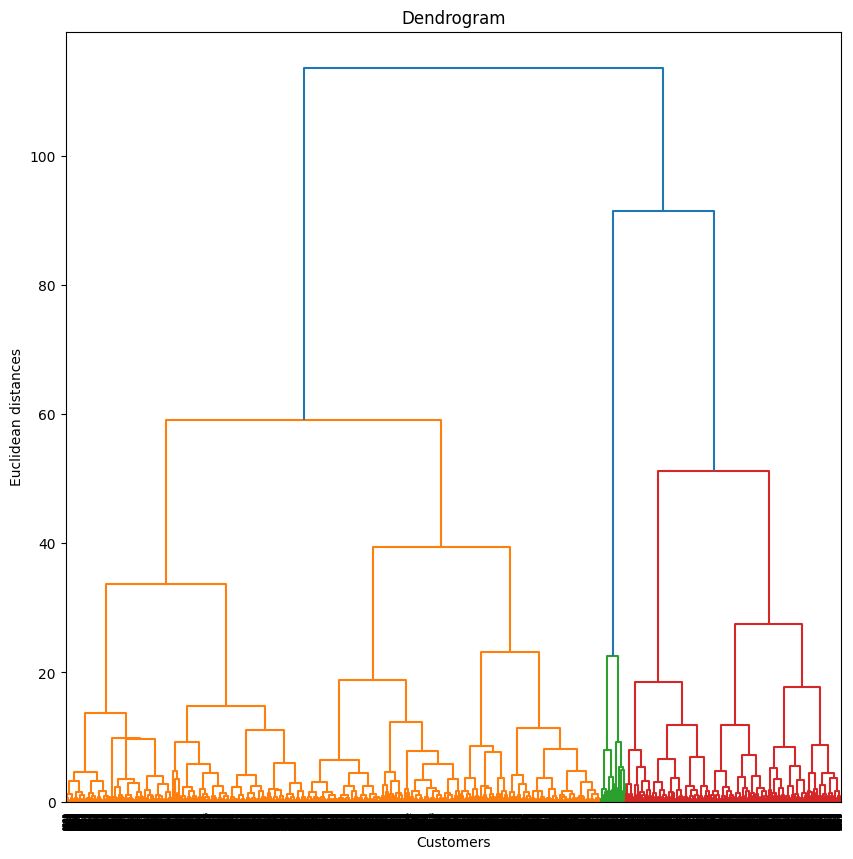

In [ ]:
plt.figure(figsize=(10,10))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

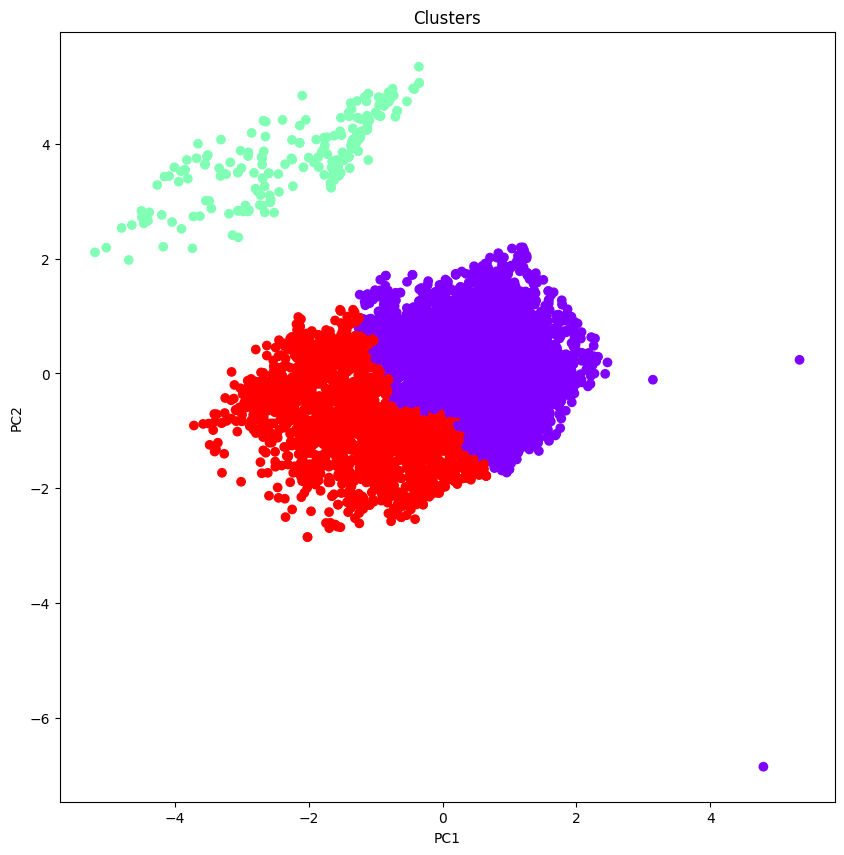

In [ ]:
clusters = fcluster(z,t=3,criterion='maxclust')

plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=clusters,cmap = 'rainbow')
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()